

Let  𝑋  be a gaussian random vector with mean  $𝑚∈ℝ^{d}$  and covariance  $ℝ^{𝑑,𝑑}$ . Show that for any matrix  $𝐴∈ℝ^{𝑑×𝑑}$  we have that
$𝔼[⟨𝑋,𝐴𝑋⟩]=Trace(𝐴Σ)+⟨𝐴𝑚⟩$.

Observe that 
\begin{equation}
E[X,AX] = \sum_{i,j}E[x_{i}A_{ij}x_{j}] =\sum_{i,j}A_{ij}E[x_{i}x_{j}]
\end{equation}
Since $Cov[U,V] = E[UV^{T}]-E[U]E[V^{T}]$, we have that 
\begin{equation}
Cov[U,V]_{ij} = E[u_{i}v_{j}] - E[u_{i}]E[v_{j}]
\end{equation}
Then, 
\begin{equation}
E[X,AX] = \sum_{i,j}A_{ij}(Cov[X]_{ij} + m_{i}m_{j}) = \sum_{i,j}A_{ij}\Sigma_{ij} + \langle m,Am\rangle 
\end{equation}
We know $\Sigma$ is symmetric. Thus, 
\begin{equation}
\sum_{i,j}A_{ij}\Sigma_{ij} = \sum_{i,j}A_{ij}\Sigma_{ji} = \sum_{i=1}^{d}\sum_{j=1}^{d}A_{ij}\Sigma_{ji} = \sum_{i=1}^{d}(A\Sigma)_{ii} = tr(A\Sigma) 
\end{equation}
Thus, 
\begin{equation}
E[X,AX] = tr(A\Sigma) + \langle m,Am\rangle 
\end{equation}

Let  𝑋  be a standard Gaussian random variable in  $ℝ$  with mean zero and variance one. Consider $𝑍=\log(1+e^{X})$.


---

1. Estimate the mean of Z 
2. Estimate the variance of Z 
3. Estimate $E[\sin(Z)]$

In [ ]:
# import necessary files 
import jax.numpy as jnp
import jax
import numpy as np 
import os as os
import pylab as plt
import h5py # to read hdf5 files

In [ ]:
# Simulate Z 
X = np.random.normal(0,1,size = 1)
Z = np.log(1. + np.exp(X))
print(Z)

[0.28447845]


0.8064230900435507
0.2719120484356824


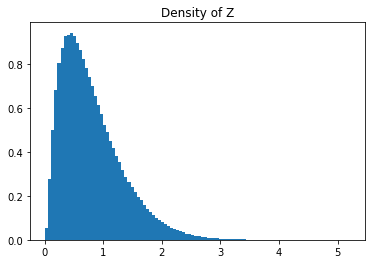

In [ ]:
# Generate many samples from Z 
N = 1000000
Xs = np.random.normal(0,1,size = N)
Zs = np.log(1 + np.exp(Xs))

_ = plt.hist(Zs,bins = 100,density = True)
plt.title("Density of Z")

# Average these samples to estimate the mean of Z 
Z_mean = np.mean(Zs)
print(Z_mean)
# Variance of Z 
Z_var = np.std(Zs) ** 2 
print(Z_var)

0.6167418159890619


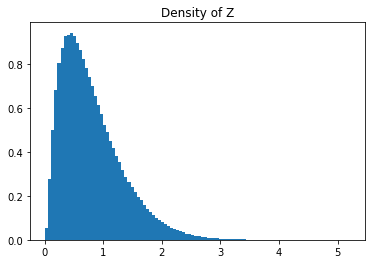

In [ ]:
# Estimate the mean of sin(Z) 
Ys = np.sin(Zs)

_ = plt.hist(Zs,bins = 100,density = True)
plt.title("Density of Z")


# Average these samples to estimate the mean of Z 
Y_mean = np.mean(Ys)
print(Y_mean)

**Rosenbrock Function**

---
Consider the function: 
\begin{equation}
F(x,y) = (x-1)^{2} + 10(y-x^{2})^{2}
\end{equation}


1.   Implement a basic gradient descent algorithm to minimize F 
2.   Find a way to visualize the tracjectory of algorithm, as well as the level lines of the function





**Gradient Descent on Rosenbrock Function**

In [ ]:
def F(x):
  return (x[0]-1) ** 2 + 10 * (x[1]-x[1] ** 2) ** 2 

In [ ]:
F([1,1])

0

**Generate Random Initial Iterate**

In [ ]:
np.random.seed(4212)

In [ ]:
x = np.random.normal(0,1,size = 2)

In [ ]:
x

array([ 1.95279638, -0.97029629])

In [ ]:
value_and_grad = jax.value_and_grad(F)

In [ ]:
value_and_grad(x)

(DeviceArray(37.45651, dtype=float32),
 DeviceArray([   1.9055927, -112.43479  ], dtype=float32))

In [ ]:
iter = 1000
learning_rate = 0.01 
history = []
iterates = []
x0 = x 
for i in range(iter):
  value,gradient = value_and_grad(x0)
  iterates.append(x0)
  x0 -= gradient * learning_rate 
  history.append(value)

In [ ]:
print(history)

[DeviceArray(37.45651, dtype=float32), DeviceArray(1.0417035, dtype=float32), DeviceArray(0.9754478, dtype=float32), DeviceArray(0.9139519, dtype=float32), DeviceArray(0.85760987, dtype=float32), DeviceArray(0.80652547, dtype=float32), DeviceArray(0.7605314, dtype=float32), DeviceArray(0.7192473, dtype=float32), DeviceArray(0.68215734, dtype=float32), DeviceArray(0.64868903, dtype=float32), DeviceArray(0.61827844, dtype=float32), DeviceArray(0.5904139, dtype=float32), DeviceArray(0.5646586, dtype=float32), DeviceArray(0.5406565, dtype=float32), DeviceArray(0.5181273, dtype=float32), DeviceArray(0.49685505, dtype=float32), DeviceArray(0.47667608, dtype=float32), DeviceArray(0.4574662, dtype=float32), DeviceArray(0.4391311, dtype=float32), DeviceArray(0.42159793, dtype=float32), DeviceArray(0.40480906, dtype=float32), DeviceArray(0.38871783, dtype=float32), DeviceArray(0.37328517, dtype=float32), DeviceArray(0.35847765, dtype=float32), DeviceArray(0.34426555, dtype=float32), DeviceArray(

In [ ]:
print(iterates)

[array([ 1.95279638, -0.97029629]), DeviceArray([1.9337404 , 0.15405166], dtype=float32), DeviceArray([1.9150655, 0.1360181], dtype=float32), DeviceArray([1.8967642 , 0.11890845], dtype=float32), DeviceArray([1.8788289 , 0.10293778], dtype=float32), DeviceArray([1.8612523 , 0.08827164], dtype=float32), DeviceArray([1.8440273 , 0.07501732], dtype=float32), DeviceArray([1.8271468 , 0.06322154], dtype=float32), DeviceArray([1.8106039 , 0.05287433], dtype=float32), DeviceArray([1.7943918 , 0.04391776], dtype=float32), DeviceArray([1.7785039 , 0.03625758], dtype=float32), DeviceArray([1.7629339 , 0.02977577], dtype=float32), DeviceArray([1.7476752 , 0.02434201], dtype=float32), DeviceArray([1.7327217 , 0.01982336], dtype=float32), DeviceArray([1.7180673 , 0.01609135], dtype=float32), DeviceArray([1.7037059 , 0.01302677], dtype=float32), DeviceArray([1.6896318 , 0.01052235], dtype=float32), DeviceArray([1.6758392 , 0.00848385], dtype=float32), DeviceArray([1.6623224 , 0.00683002], dtype=floa

**Plot Objective values over 100 iterates**

Text(0, 0.5, 'Objective Value')

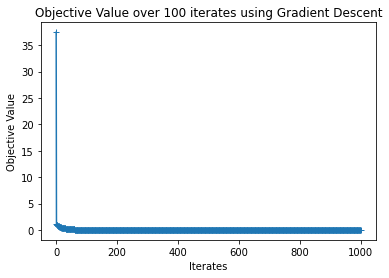

In [ ]:
plt.plot(history,"-+")
plt.title("Objective Value over 100 iterates using Gradient Descent")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

**Plot contours of the Rosenbrock function**

In [ ]:
def f(x,y):
  return 100 * (y - x**2)**2 + (1-x) ** 2 

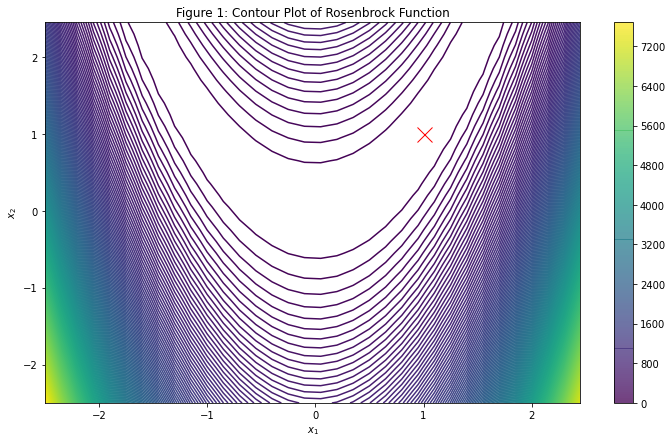

In [ ]:
# return evenly spaced x values 
X = np.arange(-2.5,2.5, 0.15)
# return evenly spaced y values, set distance to be 0.15 
# to see many points over a small interval 
Y = np.arange(-2.5,2.5,0.15)
X, Y = np.meshgrid(X, Y)
Z = f(X,Y)
plt.figure(figsize=(12, 7))
plt.xlabel("$x_{1}$")
plt.ylabel("$x_{2}$")
plt.title("Figure 1: Contour Plot of Rosenbrock Function")
plt.contour(X,Y,Z,200)

plt.colorbar()
# mark the global minimum with a red cross 
plt.plot(1,1,marker='x',markersize=15, color ='r')

**Plot the path of the iterates**

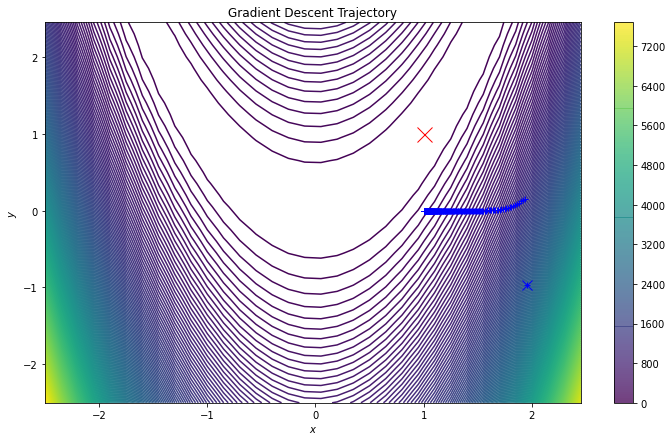

In [ ]:
plt.figure(figsize=(12, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("Gradient Descent Trajectory")
plt.contour(X,Y,Z,200)
plt.colorbar()
# mark the global minimum with a red cross 
# (1,1) is the global minimum represented by red cross 
plt.plot(1,1,marker='x',markersize=15, color ='r')
plt.plot(x[0],x[1],marker = 'x',markersize=10,color='b')
for iter in iterates: 
  plt.plot(iter[0],iter[1],marker = '+',markersize=6,color='b')
# blue line represent the path the iterates takes starting from (1.2,1.2)

**Another way to visualize Rosenbrock Function**

**Stochastic Gradient Descent**

---
Download (from luminus) the files fashion_img_training.h5 and fashion_label_training.h5 and fashion_label_val.h5 and fashion_img_val.h5 and load them into a jupyter notebook 


In [ ]:
path = r"/content/drive/MyDrive/DSA4212"

filename = "fashion_img_training.h5"
fashion_img_training = h5py.File(os.path.join(path, filename),'r')['training_images'][:]

filename = "fashion_label_training.h5"
fashion_label_training = h5py.File(os.path.join(path, filename),'r')['training_labels'][:]

filename = "fashion_img_val.h5"
fashion_img_val = h5py.File(os.path.join(path, filename),'r')['val_images'][:]

filename = "fashion_label_val.h5"
fashion_label_val = h5py.File(os.path.join(path, filename),'r')['val_labels'][:]

**Training and Validation Set**

In [ ]:
x_train = fashion_img_training.reshape(10000,28*28)
y_train = fashion_label_training
x_val = fashion_img_val.reshape(2000,28*28)
y_val = fashion_label_val 

**Parameter Initialization**

In [ ]:
# Parameter for logistic regression 
beta = np.random.normal(0,1/np.sqrt(28*28),size = (28*28))

In [ ]:
beta

array([-4.01890107e-02,  6.76842186e-03,  8.88141668e-03, -2.72387224e-03,
        7.20488830e-02,  2.36932116e-02, -1.76342488e-03, -2.96567496e-02,
       -4.16154771e-02,  4.73666534e-02, -2.77386752e-02,  2.81577363e-02,
       -5.06487489e-03,  3.18585790e-02, -1.36526640e-01, -1.95869868e-02,
        2.23066925e-02, -1.17912968e-02, -2.65271516e-02, -1.62965427e-02,
        2.37938133e-02, -5.91116867e-02,  5.72091236e-02,  5.40988092e-03,
       -5.32997380e-02,  7.08560396e-02, -3.40783426e-02,  1.24548312e-02,
       -4.98177104e-02,  4.84621262e-02, -1.28188095e-02, -1.37296654e-02,
       -1.67712362e-02, -1.73451482e-02, -4.86353529e-02, -1.46274617e-02,
        3.55879540e-02, -2.26869468e-02,  1.02499127e-01,  4.12657319e-02,
        1.42100204e-03, -6.01905649e-02,  4.57740285e-02,  1.06472481e-02,
       -2.03987620e-02, -1.30569856e-02, -1.98720894e-02,  3.16830263e-02,
        4.50026464e-02,  6.63662169e-03,  7.00522933e-02,  5.88576947e-02,
        6.79718628e-02,  

In [ ]:
np.dot(beta,x_train[0]) 

-0.0645426319647695

**Sigmoid Function**

In [ ]:
def prediction(x,beta):
  return 1/(1 + jnp.exp(-jnp.dot(beta,x)))

In [ ]:
prediction(x_train[0],beta)

DeviceArray(0.48386997, dtype=float32)

**Loss at a single example**

In [ ]:
@jax.jit
def loss_single(beta,x,y):
  return jnp.log(1 + jnp.exp(-y * jnp.dot(x,beta)))

In [ ]:
loss_single(beta,x_train[0],y_train[0])

DeviceArray(0.72593904, dtype=float32)

**vmap of logistic loss**

In [ ]:
# Do not parallize along beta 
# x parellize along the axes 0 
# y parellize along the axis 0
vmapped_logistic_loss = jax.vmap(loss_single,in_axes = (None,0,0))

In [ ]:
loss_batch = jax.vmap(loss_single,in_axes=(None,0,0))

In [ ]:
@jax.jit
def loss_LR(beta,x,y):
  # compute all the indicdual losses 
  total_loss = loss_batch(beta,x,y)
  return jnp.mean(total_loss)


loss_LR_value_and_grad = jax.jit(jax.value_and_grad(loss_LR,argnums = 0))

In [ ]:
# stochastic gradient descent 
iter = 1000
mini_batch_size = 50 
loss_history = []
beta0 = np.copy(beta)
learning_rate = 0.01 
N = len(x_train)

for i in range(iter):
  # create mini batch of images 
  img_indices = np.random.choice(N,mini_batch_size)
  x_mini_batch = x_train[img_indices]
  y_mini_batch = y_train[img_indices]

  # compute the stochastic gradient descent 
  value,gradient = loss_LR_value_and_grad(beta0,x_mini_batch,y_mini_batch)


  # one step of SGD 
  beta0 = beta0 - learning_rate * gradient 
  loss_history.append(value)

In [ ]:
print(loss_history)

[DeviceArray(0.72588474, dtype=float32), DeviceArray(0.657767, dtype=float32), DeviceArray(0.6920091, dtype=float32), DeviceArray(0.6428749, dtype=float32), DeviceArray(0.6327948, dtype=float32), DeviceArray(0.60163766, dtype=float32), DeviceArray(0.6119902, dtype=float32), DeviceArray(0.5997394, dtype=float32), DeviceArray(0.59075606, dtype=float32), DeviceArray(0.56514376, dtype=float32), DeviceArray(0.5649626, dtype=float32), DeviceArray(0.5448938, dtype=float32), DeviceArray(0.54192346, dtype=float32), DeviceArray(0.5660429, dtype=float32), DeviceArray(0.48332945, dtype=float32), DeviceArray(0.5081976, dtype=float32), DeviceArray(0.4806095, dtype=float32), DeviceArray(0.50604683, dtype=float32), DeviceArray(0.4609419, dtype=float32), DeviceArray(0.46834892, dtype=float32), DeviceArray(0.4557846, dtype=float32), DeviceArray(0.44158164, dtype=float32), DeviceArray(0.44887468, dtype=float32), DeviceArray(0.46063313, dtype=float32), DeviceArray(0.41491264, dtype=float32), DeviceArray(0

**Plot SGD Trajectory**

Text(0, 0.5, 'Objective Value')

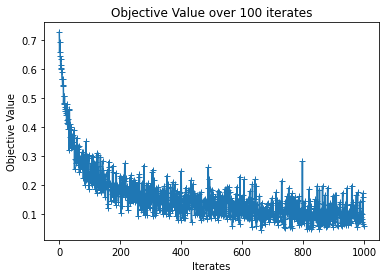

In [ ]:
plt.plot(loss_history,"-+")
plt.title("Objective Value over 100 iterates")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

In [ ]:
epochs = 10 # number of times each image have been seen 
mini_batch_size = 50 
N = len(x_train)
loss_history = []
loss_history_end_epoch = []
beta0 = np.copy(beta)
learning_rate = 0.01 
img_indices = np.arange(N)

for epoch in range(epochs): 
  # go through all mini_batches sequentially 
  total_mini_batches = N // mini_batch_size + 1 
  # randomize the indices of images 
  np.random.shuffle(img_indices)
  all_losses_within_epoch = []

  for k in range(total_mini_batches):
    batch_indices = np.arange(k*mini_batch_size,(k+1)*mini_batch_size) % N 
    batch_indices = img_indices[batch_indices]
    x_mini_batch = x_train[batch_indices]
    y_mini_batch = y_train[batch_indices]

    # stochastic gradient descent 
    value,gradient = loss_LR_value_and_grad(beta0,x_mini_batch,y_mini_batch)
    beta0 -= gradient * learning_rate 

    # record the objective value at iterate 

    loss_history.append(value)
    all_losses_within_epoch.append(value)

  
  loss_history_end_epoch.append(np.mean(all_losses_within_epoch))



** Plot loss at the end of each epoch**

Text(0, 0.5, 'Objective Value')

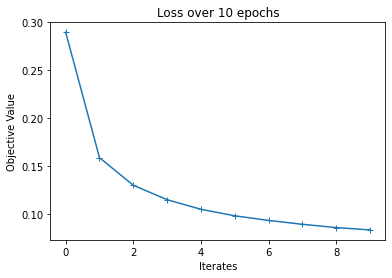

In [ ]:
plt.plot(loss_history_end_epoch,"-+")
plt.title("Loss over 10 epochs")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

Text(0, 0.5, 'Objective Value')

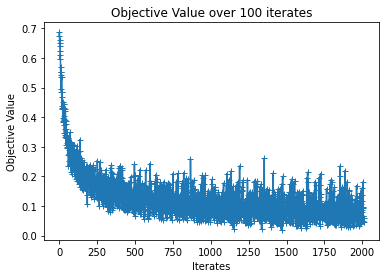

In [ ]:
plt.plot(loss_history,"-+")
plt.title("Objective Value over 100 iterates")
plt.xlabel("Iterates")
plt.ylabel("Objective Value")

**Finding optimal learning_rate and epoch value**

In [ ]:
def run_SGD(min_batch_size,x,y,beta):
  epochs = 10 # number of times each image have been seen 
  N = len(x)
  loss_history = []
  loss_history_end_epoch = []
  beta0 = np.copy(beta)
  learning_rate = 0.01 
  img_indices = np.arange(N)

  for epoch in range(epochs): 
  # go through all mini_batches sequentially 
    total_mini_batches = N // mini_batch_size + 1 
  # randomize the indices of images 
    np.random.shuffle(img_indices)
    all_losses_within_epoch = []

    for k in range(total_mini_batches):
      batch_indices = np.arange(k*mini_batch_size,(k+1)*mini_batch_size) % N 
      batch_indices = img_indices[batch_indices]
      x_mini_batch = x[batch_indices]
      y_mini_batch = y[batch_indices]

      # stochastic gradient descent 
      value,gradient = loss_LR_value_and_grad(beta0,x_mini_batch,y_mini_batch)
      beta0 -= gradient * learning_rate 

      # record the objective value at iterate 

      loss_history.append(value)
      all_losses_within_epoch.append(value)

  
    loss_history_end_epoch.append(np.mean(all_losses_within_epoch))

  
  return loss_history_end_epoch


In [ ]:
import time 

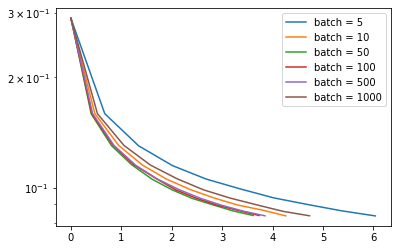

In [ ]:
for mini_batch in [5,10,50,100,500,1000]:
  start = time.time()
  loss_history_end_epoch = run_SGD(mini_batch,x_train,y_train,beta)
  end = time.time()
  plt.plot(np.arange(10)*(end-start),loss_history_end_epoch,label = f"batch = {mini_batch}")

plt.legend()
plt.yscale("log")

